In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1
## 1.1 Waveguide Structure


In [4]:
n2 = 1.56   # Core (higher than cladding)
n1 = 1.45  # Cladding

# Max theta incident on waveguide for TIRF/ light acceptance angle in degrees:
theta_max = np.degrees(np.arcsin(np.sqrt(n2**2 - n1**2))) # maximum light acceptance angle of the waveguide (1.1)
delta = (n2**2 - n1**2) / (2*n2**2)                       # relative refractive-index difference between core and cladding (1.3) 
NA = np.radians (theta_max)                               # numerical aperture 
theta_max, NA,delta

(35.128552629911532, 0.61310890485206937, 0.06802679158448392)

## 1.2 Formation of Guided Modes
Even at angles smaller than the critical angle, arbitrary angles are not able to propagate in a waveguide. Each mode is associated with light rays at a discrete angle of propagation as given by EM wave analysis.

In [5]:
# Inside the core for a plane wave propagating along z with angle phi:
lambda_0 = 0.000155        # Free space wavelength (um) 
lambda_cm=0.000155

In [6]:
k = 2*np.pi / lambda_0        # Free space wavenumber
k1 = n2 * k                   # Wavenumber in core
k,k1


(40536.679401158624, 63237.219865807456)

In [7]:
# Propagation angle inside core
phi_max = np.degrees(np.arcsin(np.sin(NA) / n2))  # (Snell's Law)
phi_max

21.644983739102422

In [8]:
phi = phi_max
eps = np.sin(np.radians(phi)) / np.sqrt(2*delta) # (1.13) Note that this is normalised to 1 for when phi = phi_max
eps  

1.0

In [9]:
a = 0.00004     # Half depth of waveguide (um)
mode = 5    # Mode numbers to plot

# Create linearly spaced array of eps corresponding to phi = 0.1 to phi_max for graph
phi_eps = np.linspace (0.1,phi_max)
eps_g = np.sin(np.radians(phi_eps)) / np.sqrt(2*delta)
eps_g

array([ 0.00473175,  0.02553661,  0.04633995,  0.06714057,  0.08793724,
        0.10872873,  0.12951381,  0.15029126,  0.17105987,  0.1918184 ,
        0.21256564,  0.23330035,  0.25402133,  0.27472735,  0.29541718,
        0.31608962,  0.33674345,  0.35737744,  0.37799039,  0.39858108,
        0.41914829,  0.43969082,  0.46020746,  0.48069699,  0.50115822,
        0.52158993,  0.54199092,  0.56236   ,  0.58269595,  0.60299759,
        0.62326372,  0.64349315,  0.66368467,  0.68383712,  0.70394929,
        0.72402   ,  0.74404808,  0.76403233,  0.78397159,  0.80386469,
        0.82371044,  0.84350768,  0.86325525,  0.88295198,  0.90259671,
        0.92218828,  0.94172555,  0.96120735,  0.98063255,  1.        ])

In [10]:
a = 0.00004     # Half depth of waveguide (um)
mode = 5    # Mode numbers to plot

v = k*n2*a*np.sqrt(2*delta)  # Normalised frequency, LHS of dispersion eqn (1.15)
v

0.93301312229350752

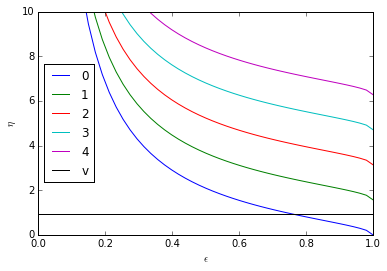

In [11]:
# Plot modes (fig 1.5)
for m in range(mode):
    nu = (np.arccos(np.array(eps_g)) + m*np.pi*(np.array(eps_g)) / 2 ) /(np.array(eps_g))  # (RHS dispersion eqn)
    plt.plot(eps_g,nu, label=m)

plt.axhline(v, color='black', label='v')        # Plot the line corresponding to v
plt.xlim(0,1); plt.ylim(0,10); plt.legend(loc='best');
plt.xlabel('$\epsilon$'); plt.ylabel('$\eta$')

The crossing point between v (a function of the core refractive index, the cladding refractive index, the wavelength and the core diameter) and $\eta$, or v = $\eta$, gives $\varepsilon_m$ for each mode. When v < v$_c$ = $\pi$/2 the waveguide only supports one mode. The propagation constant, $\beta_m$, for each mode may be obtained as follows:

In [12]:
import scipy.optimize as optimize

# Solve for epsilon_m where m is mode number
m = 0   # Use only mode 0 as this is the only mode where v crosses eta between eps= 0:1
def func(eps_g):
    nu = (np.arccos(eps_g) + m*np.pi / 2 ) / eps_g
    return nu - v

eps_m = optimize.brentq(func, 0.01, 1)
eps_m

0.759349688952599

In [13]:
phi = np.arcsin(eps_m * np.sqrt(2*delta))  # Returns phi in radians - propagation angle of mode m (1.13)
beta = k * n2 * np.cos(phi)                # Beta of mode m (1.5)
np.degrees(phi), beta 

(16.265545768856995, 60706.080230866886)

In [14]:
vc = np.pi / 2                                      # Cutoff v-value above which waveguide is not single mode

lam_c = (2*np.pi / vc) * a * n1 * np.sqrt(2*delta)  # (1.16)

print('Waveguide is single moded for lambda > %.2f um' % lam_c)

if v <= np.pi/2:
    print('Single Mode Achieved. Core wavelength: %.2f um' % (lambda_0 / n1)) 
else:
    print('Structure supports more than one mode')

Waveguide is single moded for lambda > 0.00 um
Single Mode Achieved. Core wavelength: 0.00 um


# 2.1.2 Dispersion Equations for TE and TM modes

In [15]:
kappa = np.sqrt (k**2*n2**2-beta**2)
sigma = np.sqrt (beta**2-k**2*n1**2)
kappa,sigma

(17712.080605056704, 15177.388761654584)

In [16]:
a1 = np.linspace (0.00001,a+0.0002)
u = kappa*a1
omega = sigma*a1


In [17]:
omega1 = u*np.tan(u)  #dispersion equation (2.24)      

(0, 1.5)

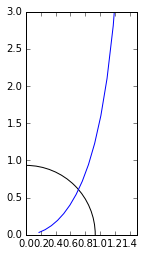

In [18]:
cir1 = plt.Circle((0,0), radius=v,fc='w') #Creates a patch that looks like a circle (fc= face color)
ax = plt.axes(aspect=1) #Creates empty axes (aspect=1 means scale things so that circles look like circles)
ax.add_patch(cir1) #Grab the current axes, add the patch to it
plt.plot()
plt.plot(u,omega1)
plt.ylim (0,3)
plt.xlim (0,1.5)

In [19]:
x = np.linspace(-(a+0.0004),(a+0.0004),100)
x

array([ -4.40000000e-04,  -4.31111111e-04,  -4.22222222e-04,
        -4.13333333e-04,  -4.04444444e-04,  -3.95555556e-04,
        -3.86666667e-04,  -3.77777778e-04,  -3.68888889e-04,
        -3.60000000e-04,  -3.51111111e-04,  -3.42222222e-04,
        -3.33333333e-04,  -3.24444444e-04,  -3.15555556e-04,
        -3.06666667e-04,  -2.97777778e-04,  -2.88888889e-04,
        -2.80000000e-04,  -2.71111111e-04,  -2.62222222e-04,
        -2.53333333e-04,  -2.44444444e-04,  -2.35555556e-04,
        -2.26666667e-04,  -2.17777778e-04,  -2.08888889e-04,
        -2.00000000e-04,  -1.91111111e-04,  -1.82222222e-04,
        -1.73333333e-04,  -1.64444444e-04,  -1.55555556e-04,
        -1.46666667e-04,  -1.37777778e-04,  -1.28888889e-04,
        -1.20000000e-04,  -1.11111111e-04,  -1.02222222e-04,
        -9.33333333e-05,  -8.44444444e-05,  -7.55555556e-05,
        -6.66666667e-05,  -5.77777778e-05,  -4.88888889e-05,
        -4.00000000e-05,  -3.11111111e-05,  -2.22222222e-05,
        -1.33333333e-05,

In [20]:
E1 = 1
Ey = np.zeros(x.size) 


In [21]:
# Electectric field distribition is expressed as:
for i, posn in enumerate(x):

    if posn <= -a:
        Ey[i] = E1*np.cos (kappa*a)*np.exp (sigma*(posn+a))
    elif posn >= a:
        Ey[i] = E1*np.cos (kappa*a)*np.exp (-sigma*(posn-a))
    elif (posn <=a) & (posn>=-a):
        Ey[i] = E1*np.cos (kappa*posn)

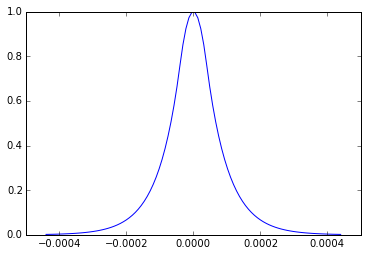

In [22]:
plt.plot (x,Ey)

## other parameter

In [24]:
theta_c_rad = np.arcsin(n2/n1)                #critical angle in radians
theta_c_rad

C:\Users\suraya.ahmadkamil\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: invalid value encountered in arcsin
  if __name__ == '__main__':


nan